# Machine Learning 1 - Nearest Neighbors and Decision Trees

In this lab, as in the next two, we will explore different classification methods, and how we can compare their results. For those three labs, we will use a simplified version of the **[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) object recognition dataset**. 

This lab will use **decision trees** and **random forest** methods. In Lab 6, we will use neural networks, and in Lab 7 Support Vector Machines.

## Important note

For this lab and the next two, **each student must write a report** (one report for the three labs together) which will be used during the oral exam. This report should highlight the different methods used during the labs, but also how you validated each method and compared their results.

## Lab objectives

* Classification with decision trees and random forests.
* Cross-validation and evaluation.

## Introduction to the dataset

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset has been collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. It consists of 60.000 32x32 colour images, split in 10 classes: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.

*Reference: Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.* PDF available at https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

For the purpose of the INFO-H-501 laboratories, we will use a subset of those images by only taking 3 different classes: 'airplane', 'bird' and 'horse'.

The modified dataset can be downloaded here: https://www.dropbox.com/s/b0mr9o21613npd2/CIFAR10.zip?dl=1.

The images are 32x32 8-bit **RGB**, and from these we extracted **Histogram of Gradient** vectors (16 orientations x 16 blocks = 256 values in HoG vector).

The following code pre-loads all of this data:

In [4]:
from lab_tools import CIFAR10, evaluate_classifier, get_hog_image

## Examples from the dataset

Pre-loading training data
Pre-loading test data


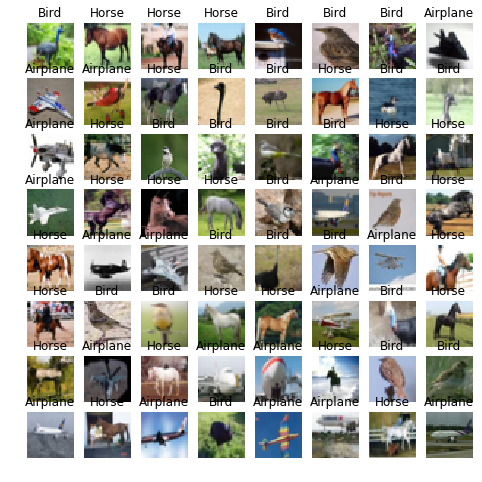

In [5]:
dataset = CIFAR10('./CIFAR10')
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(dataset.train['images'][i].reshape((32,32,3)), interpolation='none')
    plt.title(dataset.labels[dataset.train['labels'][i]])
    plt.axis('off')
plt.show()

[[[0.00639892 0.00207143 0.00134132 0.00083804 0.00054487 0.00071279
   0.00143664 0.         0.00870999 0.00933019 0.00299161 0.0114616
   0.00489774 0.00742962 0.00297496 0.00109459]
  [0.0059459  0.00269189 0.000995   0.00204227 0.00272224 0.00108741
   0.00204775 0.00111773 0.00403429 0.00417364 0.00510272 0.00350954
   0.00458229 0.00586226 0.00053744 0.00437902]
  [0.01049403 0.00655464 0.00778205 0.00580688 0.00369904 0.01208024
   0.00501849 0.00236726 0.00402066 0.         0.0006825  0.00247592
   0.0010178  0.         0.00037779 0.00749471]
  [0.00735356 0.00470517 0.00362212 0.00464854 0.00221551 0.00138422
   0.00344435 0.00257908 0.00192019 0.00116077 0.00130674 0.00035208
   0.00086167 0.00150382 0.00180049 0.00074283]]

 [[0.00122986 0.00055845 0.00405953 0.00048014 0.00111584 0.00136568
   0.00168864 0.00223364 0.00365924 0.00323417 0.00134791 0.00435787
   0.00114227 0.00286463 0.00407625 0.        ]
  [0.00463577 0.00311424 0.00420814 0.0051757  0.00242903 0.00057566


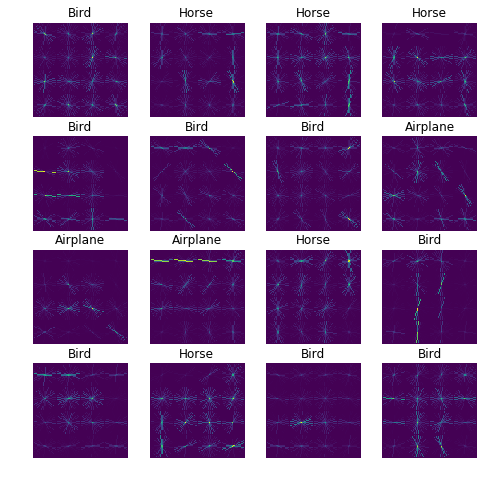

In [6]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    hog = dataset.train['hog'][i].reshape((4,4,16))
    plt.imshow(get_hog_image(hog, 128), interpolation='none')
    plt.title(dataset.labels[dataset.train['labels'][i]])
    plt.axis('off')
    print(hog)
plt.show()

# 1. Nearest Neighbor

The following example uses the Nearest Neighbor algorithm on the Histogram of Gradient decriptors in the dataset.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=100)
clf.fit( dataset.train['hog'], dataset.train['labels'] )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [16]:
# Evaluate Training error (=descriptive) :
accuracy, conf_mat = evaluate_classifier(clf, dataset.train['hog'], dataset.train['labels'])

In [17]:
print("Training accuracy: %.2f %%"%accuracy)
print("Confusion matrix:")
print(conf_mat)

Training accuracy: 68.09 %
Confusion matrix:
[[2303  129   27]
 [1872 4128 1190]
 [ 825  743 3783]]


In [18]:
# Evaluate Test error (=predictive) :
accuracy, conf_mat = evaluate_classifier(clf, dataset.test['hog'], dataset.test['labels'])

In [19]:
print("Test accuracy: %.2f %%"%accuracy)
print("Confusion matrix:")
print(conf_mat)

Test accuracy: 67.30 %
Confusion matrix:
[[441  26   5]
 [413 832 249]
 [146 142 746]]


Explain those results. **What could improve the performances of this classifier ?**

You do not need to code anything for this classifier.

## 2. Decision Trees

[Decision Trees](http://scikit-learn.org/stable/modules/tree.html#tree) classify the data by splitting the feature space according to simple, single-feature rules. Scikit-learn uses the [CART](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29) algorithm for [its implementation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of the classifier. 

* **Create a simple Decision Tree classifier** using scikit-learn and train it on the HoG training set.
* Evaluate the performance of the classifier on the test dataset.
* Build a **full classification pipeline** to find the best parameters for this classifier with **[cross-validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)**.

In [28]:
from sklearn import tree
import numpy as np

clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(dataset.train['hog'], dataset.train['labels'])

In [29]:
accuracy, conf_mat = evaluate_classifier(clf_dt, dataset.train['hog'], dataset.train['labels'])

In [30]:
print("Training accuracy: %.2f %%"%accuracy)
print("Confusion matrix:")
print(conf_mat)

Training accuracy: 100.00 %
Confusion matrix:
[[5000    0    0]
 [   0 5000    0]
 [   0    0 5000]]


In [31]:
accuracy, conf_mat = evaluate_classifier(clf_dt, dataset.test['hog'], dataset.test['labels'])

In [32]:
print("Training accuracy: %.2f %%"%accuracy)
print("Confusion matrix:")
print(conf_mat)

Training accuracy: 57.77 %
Confusion matrix:
[[608 205 155]
 [226 532 252]
 [166 263 593]]


### a. Divide training set using k-fold cross validation :

In [64]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
k = 5
kf = StratifiedKFold(k)

for train,test in kf.split(dataset.train['hog'], dataset.train['labels']):
    train_x = dataset.train['hog'][train]
    train_y = dataset.train['labels'][train]
    
    test_x = dataset.train['hog'][test]
    test_y = dataset.train['labels'][test]

### b. Initialize two decision trees with two criterion (Gini and entropy) :

In [65]:
clf_dt_gini = tree.DecisionTreeClassifier(criterion='gini')
clf_dt_entropy = tree.DecisionTreeClassifier(criterion='entropy')

dt_gini_score = 0
dt_entropy_score = 0
dt_gini_conf = np.zeros((3,3))
dt_entropy_conf = np.zeros((3,3))

### c. Train both on the k (k=5) training sets and test on corresponding validation sets :

In [62]:
for train,test in kf.split(dataset.train['hog'], dataset.train['labels']):
    train_x = dataset.train['hog'][train]
    train_y = dataset.train['labels'][train]
    
    test_x = dataset.train['hog'][test]
    test_y = dataset.train['labels'][test]
    
    clf_dt_gini = clf_dt_gini.fit(train_x, train_y)
    clf_dt_entropy = clf_dt_entropy.fit(train_x, train_y)
    
    accuracy_gini, conf_mat_gini = evaluate_classifier(clf_dt_gini, test_x, test_y)
    accuracy_entropy, conf_mat_entropy = evaluate_classifier(clf_dt_entropy, test_x, test_y)    
    dt_gini_score = dt_gini_score + accuracy_gini
    dt_entropy_score = dt_entropy_score + accuracy_entropy
    dt_gini_conf = dt_gini_conf + conf_mat_gini
    dt_entropy_conf = dt_entropy_conf + conf_mat_entropy

### d. Compute the mean of the accuracy and confusion matrix :

In [63]:
dt_gini_score = dt_gini_score/k
dt_entropy_score = dt_entropy_score/k
dt_gini_conf = dt_gini_conf/k
dt_entropy_conf = dt_entropy_conf/k

print("Gini validation accuracy: %.2f %%"%dt_gini_score)
print("Gini confusion matrix:")
print(dt_gini_conf)

print("Entropy validation accuracy: %.2f %%"%dt_entropy_score)
print("Entropy confusion matrix:")
print(dt_entropy_conf)

Gini validation accuracy: 57.71 %
Gini confusion matrix:
[[619.  207.6 157.2]
 [230.4 532.2 262.6]
 [150.6 260.2 580.2]]
Entropy validation accuracy: 57.40 %
Entropy confusion matrix:
[[621.4 217.4 150. ]
 [221.4 514.6 264. ]
 [157.2 268.  586. ]]


### Repeat for other hyper-parameters :  
Maximum depth

In [69]:
clf_dt_md_9 = tree.DecisionTreeClassifier(max_depth=9)
clf_dt_md_11 = tree.DecisionTreeClassifier(max_depth=11)
clf_dt_md_13 = tree.DecisionTreeClassifier(max_depth=13)

dt_md_9_score = 0
dt_md_11_score = 0
dt_md_13_score = 0
dt_md_9_conf = np.zeros((3,3))
dt_md_11_conf = np.zeros((3,3))
dt_md_13_conf = np.zeros((3,3))

for train,test in kf.split(dataset.train['hog'], dataset.train['labels']):
    train_x = dataset.train['hog'][train]
    train_y = dataset.train['labels'][train]
    
    test_x = dataset.train['hog'][test]
    test_y = dataset.train['labels'][test]
    
    clf_dt_md_9 = clf_dt_md_9.fit(train_x, train_y)
    clf_dt_md_11 = clf_dt_md_11.fit(train_x, train_y)
    clf_dt_md_13 = clf_dt_md_13.fit(train_x, train_y)
    
    accuracy_md_9, conf_mat_md_9 = evaluate_classifier(clf_dt_md_9, test_x, test_y)
    accuracy_md_11, conf_mat_md_11 = evaluate_classifier(clf_dt_md_11, test_x, test_y)
    accuracy_md_13, conf_mat_md_13 = evaluate_classifier(clf_dt_md_13, test_x, test_y)
    
    dt_md_9_score = dt_md_9_score + accuracy_md_9
    dt_md_11_score = dt_md_11_score + accuracy_md_11
    dt_md_13_score = dt_md_13_score + accuracy_md_13
    dt_md_9_conf = dt_md_9_conf + conf_mat_md_9
    dt_md_11_conf = dt_md_11_conf + conf_mat_md_11
    dt_md_13_conf = dt_md_13_conf + conf_mat_md_13

In [70]:
dt_md_9_accuracy = dt_md_9_score/k
dt_md_11_accuracy = dt_md_11_score/k
dt_md_13_accuracy = dt_md_13_score/k
dt_md_9_conf_mat = dt_md_9_conf/k
dt_md_11_conf_mat = dt_md_11_conf/k
dt_md_13_conf_mat = dt_md_13_conf/k

print("Max-depth of 9 validation accuracy: %.2f %%"%dt_md_9_accuracy)
print("Max-depth of 9 confusion matrix:")
print(dt_md_9_conf_mat)

print("Max-depth of 11 validation accuracy: %.2f %%"%dt_md_11_accuracy)
print("Max-depth of 11 confusion matrix:")
print(dt_md_11_conf_mat)

print("Max-depth of 13 validation accuracy: %.2f %%"%dt_md_13_accuracy)
print("Max-depth of 13 confusion matrix:")
print(dt_md_13_conf_mat)

Max-depth of 9 validation accuracy: 60.35 %
Max-depth of 9 confusion matrix:
[[615.6 166.6 114.8]
 [250.6 622.6 313. ]
 [133.8 210.8 572.2]]
Max-depth of 11 validation accuracy: 59.19 %
Max-depth of 11 confusion matrix:
[[611.6 180.6 129.8]
 [247.4 593.  299. ]
 [141.  226.4 571.2]]
Max-depth of 13 validation accuracy: 59.42 %
Max-depth of 13 confusion matrix:
[[613.4 183.2 135. ]
 [242.2 589.6 285.4]
 [144.4 227.2 579.6]]


### Repeat for other hyper-parameters :  
min_samples_leaf with max_depth = 9

In [80]:
min_samples_leaf = np.linspace(1, 16, 8, endpoint=True)

dt_msl_train_score = []
dt_msl_validation_score = []

for msl in min_samples_leaf:
    clf_dt = tree.DecisionTreeClassifier(min_samples_leaf=int(msl), max_depth=9)
    dt_train_accuracy = 0
    dt_test_accuracy = 0
    for train,test in kf.split(dataset.train['hog'], dataset.train['labels']):
        train_x = dataset.train['hog'][train]
        train_y = dataset.train['labels'][train]

        test_x = dataset.train['hog'][test]
        test_y = dataset.train['labels'][test]

        clf_dt = clf_dt.fit(train_x, train_y)

        train_accuracy, conf_mat = evaluate_classifier(clf_dt, train_x, train_y)
        test_accuracy, conf_mat = evaluate_classifier(clf_dt, test_x, test_y)
        dt_train_accuracy = dt_train_accuracy + train_accuracy
        dt_test_accuracy = dt_test_accuracy + test_accuracy
    
    dt_train_accuracy = dt_train_accuracy/k
    dt_test_accuracy = dt_test_accuracy/k
    dt_msl_train_score.append(dt_train_accuracy)
    dt_msl_validation_score.append(dt_test_accuracy)

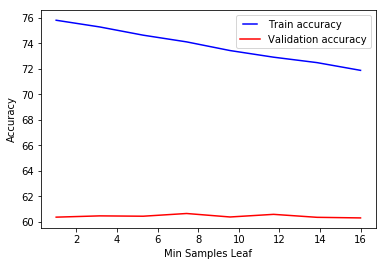

In [85]:
from matplotlib import pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leaf, dt_msl_train_score, 'b', label="Train accuracy")
line2, = plt.plot(min_samples_leaf, dt_msl_validation_score, 'r', label="Validation accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Min Samples Leaf')
plt.show()


### Run down of tested parameters
- Criterion:  
Gini = 57,71%  Entropy = 57,4%
- Maximum depth:  
\[3, 5, 7, 9, 11, 13\] Best : 9 = 60.35

**Evaluate your best classifier** on the test set. How can you compare it to the classifier with default parameters ?

## 3. Random Forests

[Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifiers use multiple decision trees trained on "weaker" datasets (less data and/or less features), averaging the results so as to reduce over-fitting.

* Use scikit-learn to **create a Random Forest classifier** on the CIFAR data. 
* **Use cross-validation to test different parameters**
* **Evaluate your best classifier on the test set**. 
* Compare the results with the previous classifiers.

In [13]:
from sklearn import ensemble

# --- Your code here --- #
